# Análisis estadístico de Data Products

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Data/DP6_covid19-peru_info-fallecidos.csv')

In [11]:
# Convertir a formato fecha
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], format = '%Y-%m-%d')

lst_dates = ['fecha_vacuna_1', 'fecha_vacuna_2', 'fecha_vacuna_3']
for date in lst_dates:
    df.loc[:,date] = pd.to_datetime(df[date], format = '%Y%m%d')
del lst_dates, date

In [12]:
df

,id_persona,fecha_fallecimiento,year,epi_week,time_days,sexo,edad,edad_cat,departamento,vacunado,dosis_1,fecha_vacuna_1,id_vacuna_1,dosis_2,fecha_vacuna_2,id_vacuna_2,dosis_3,fecha_vacuna_3,id_vacuna_3
0,36527082.0,2020-03-03,2020,10,1,1,63,5,22,0,0,NaT,0,0,NaT,0,0,NaT,0
1,36401995.0,2020-03-04,2020,10,2,1,85,7,22,0,0,NaT,0,0,NaT,0,0,NaT,0
2,36853977.0,2020-03-07,2020,10,5,2,24,1,16,0,0,NaT,0,0,NaT,0,0,NaT,0
3,NaN,2020-03-11,2020,11,9,2,78,6,20,0,0,NaT,0,0,NaT,0,0,NaT,0
4,36614476.0,2020-03-14,2020,11,12,1,4,0,15,0,0,NaT,0,0,NaT,0,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203984,34786113.0,2022-01-20,2022,3,689,1,59,4,15,0,1,2021-12-20,5,0,NaT,0,0,NaT,0
203985,5109439.0,2022-01-20,2022,3,689,1,82,7,15,1,1,2021-04-25,5,1,2021-05-16,5,1,2022-01-03,5
203986,12500493.0,2022-01-20,2022,3,689,1,42,3,15,0,0,NaT,0,0,NaT,0,0,NaT,0
203987,1581225.0,2022-01-20,2022,3,689,2,58,4,20,1,1,2021-07-13,5,1,2021-08-03,5,0,NaT,0


In [13]:
# Dataframe de fallecidos Vacunados a partir de X fecha
df_falVac = df[((df.year >= 2021) & (df.epi_week >= 43)) | (df.year >= 2022)]

# Columna de No Vacunados, para contabilizar a quienes no tienen ni la 1ra dosis
df_falVac['no_vac'] = np.where(df_falVac['dosis_1'] == 0, 1, 0)
df_falVac['total_dosis'] = df_falVac.dosis_1 + df_falVac.dosis_2 + df_falVac.dosis_3

df_falVac = df_falVac[['year','epi_week', 'no_vac','dosis_1', 'dosis_2', 'dosis_3', 'total_dosis' ]]

ct_falVac = pd.crosstab(index = [df_falVac['year'],df_falVac['epi_week']],
                        columns = df_falVac['total_dosis'])

ct_falVac

total_dosis      0   1    2   3
year epi_week                  
2021 43         78  20  109   1
     44         70  23  117   0
     45         74  19  113   1
     46         95  13  133   2
     47         84  10  150   8
     48         97  14  150   6
     49        114  12  134  10
     50        102  17  140  18
     51         96  14  123  10
     52        100  26  115  34
2022 1          93  30  137  34
     2         120  29  215  83
     3         151  27  244  77

<AxesSubplot:xlabel='year,epi_week'>

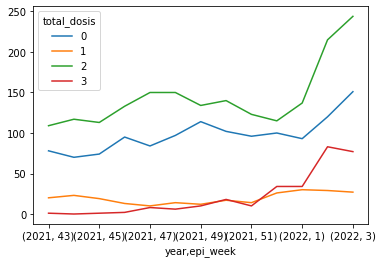

In [14]:
ct_falVac.plot()

In [18]:
df = pd.read_csv('Data/DP4_covid19-peru_x_fecha.csv')

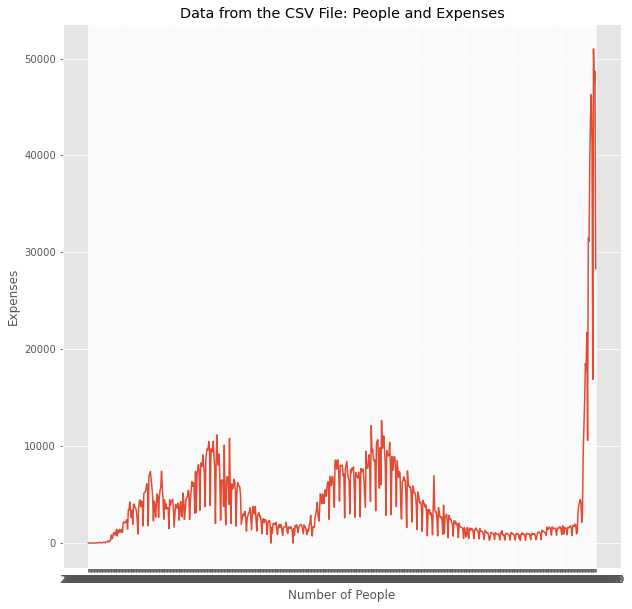

In [24]:
fig, ax = plt.subplots(figsize=(10,10))  # Create a figure
plt.style.use('ggplot')  # Using the style for the plot

plt.plot(df['date'],df['casos'])

plt.title('Data from the CSV File: People and Expenses')

plt.xlabel('Number of People')
plt.ylabel('Expenses')

plt.show()